# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import sys
sys.path.append("../")
from src.data_loading import load_traindata

In [3]:
df = load_traindata().dropna(axis=1) # dropping the last column as it is empty.
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


### Since the target variable 'prognosis' is of data type object, it's not suitable for the model. so lets encode it using label encoder.

In [ ]:
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [7]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


### now we will be spliting our data into two sets, one for trainig and one for testing the model.

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Train : {X_train.shape}, {y_train.shape}")
print(f"Test : {X_test.shape}, {y_test.shape}")

Train : (3936, 132), (3936,)
Test : (984, 132), (984,)


# Model building

In [12]:
# Defining scoring metric for k-fold cross validation
def cv_score(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing models
models={
    "SVC": SVC(),
    "GaussianNB":GaussianNB(),
    "RandomForest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_score)
    print("="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")
    

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
GaussianNB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
RandomForest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


### Training and testing SVC model

Accuracy of svm model on training data: 100.0
Accuracy of svm model on test data: 100.0


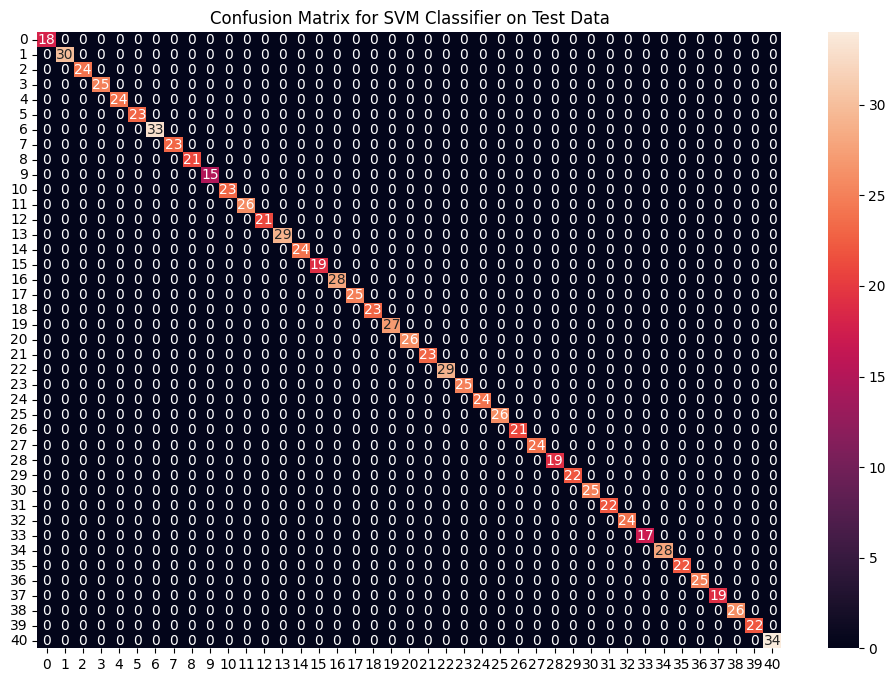

In [16]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy of svm model on training data: {accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy of svm model on test data: {accuracy_score(y_test,svm_model.predict(X_test))*100}")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

### Training and testing Naive Bayes Classifier

Accuracy of Naive Bayes model on training data: 100.0
Accuracy of Naive Bayes model on test data: 100.0


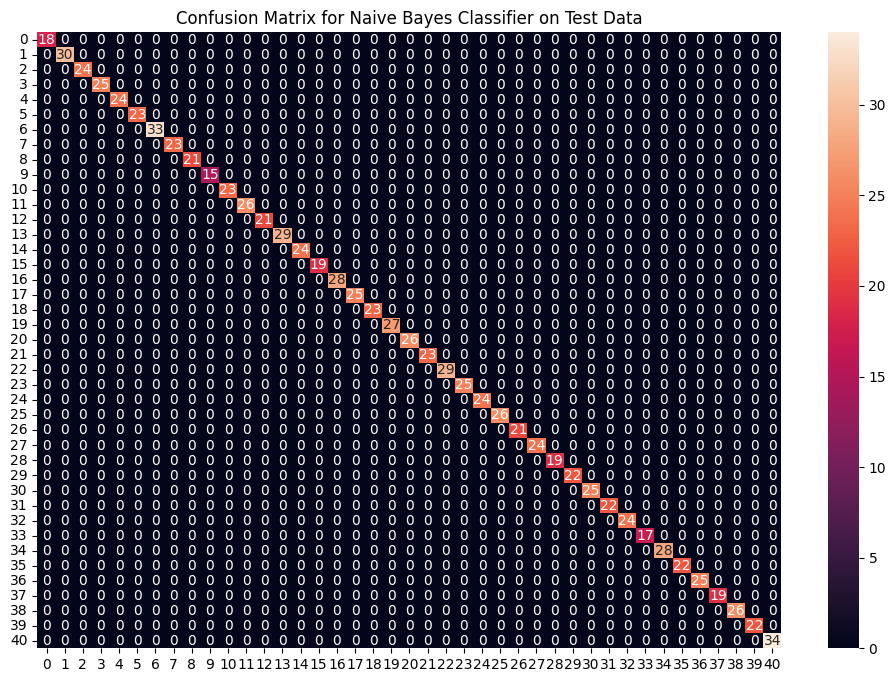

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy of Naive Bayes model on training data: {accuracy_score(y_train,nb_model.predict(X_train))*100}")
print(f"Accuracy of Naive Bayes model on test data: {accuracy_score(y_test,preds)*100}")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

### Training and testing Random Forest Classifier

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


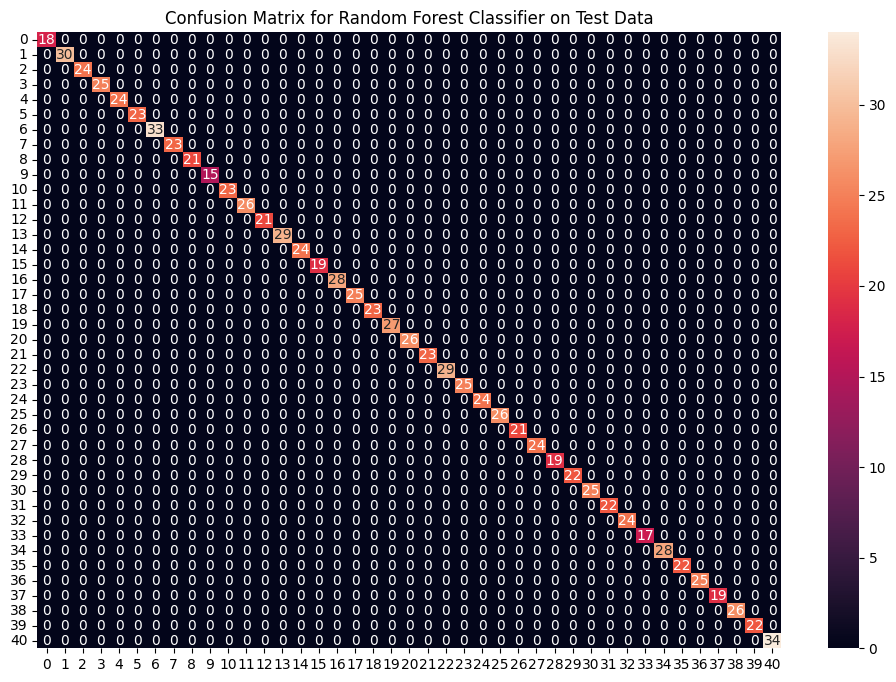

In [20]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()